### Goals
- Understand density based clustering
- Weather station clustering
- Data cleaning, selection, visulization
- Model Train, Test and Evaluation

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [27]:
# Loading the dataset
weather_df = pd.read_csv("./datasets/weather_stations.csv")
weather_df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [28]:
# Exploring the dataset
print(weather_df.size)
print(weather_df.shape)
print(weather_df.columns)
print(weather_df.dtypes)
# print(weather_df.info())
# print(weather_df.describe())

33525
(1341, 25)
Index(['Stn_Name', 'Lat', 'Long', 'Prov', 'Tm', 'DwTm', 'D', 'Tx', 'DwTx',
       'Tn', 'DwTn', 'S', 'DwS', 'S%N', 'P', 'DwP', 'P%N', 'S_G', 'Pd', 'BS',
       'DwBS', 'BS%', 'HDD', 'CDD', 'Stn_No'],
      dtype='object')
Stn_Name     object
Lat         float64
Long        float64
Prov         object
Tm          float64
DwTm        float64
D           float64
Tx          float64
DwTx        float64
Tn          float64
DwTn        float64
S           float64
DwS         float64
S%N         float64
P           float64
DwP         float64
P%N         float64
S_G         float64
Pd          float64
BS          float64
DwBS        float64
BS%         float64
HDD         float64
CDD         float64
Stn_No       object
dtype: object


In [39]:
# Cleaning
# NaN, string float, are there
# Remove NaN, remove, String, reset index
#Select the feature set 
# Do some plotting
# weather_df = weather_df.dropna()
weather_df = weather_df[pd.notnull(weather_df["Tm"])]
weather_df = weather_df.dropna(subset=["Lat", "Long"])
weather_df = weather_df.reset_index(drop=True)
weather_df.shape
weather_df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


In [40]:
# Selecting numerical columns for clustering
num_cols = weather_df.select_dtypes(include=[np.number]).columns
data = weather_df[num_cols]
data.head()
print(data["Lat"].isnull().values.any())
print(data["Long"].isnull().values.any())
# Extracting Latitude and Longitude 
coords = weather_df[["Lat", "Long"]].values
print(coords)

False
False
[[  48.935 -123.742]
 [  48.824 -124.133]
 [  48.829 -124.052]
 ...
 [  58.333  -62.586]
 [  54.716  -58.358]
 [  52.923  -66.865]]


In [41]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)
print(coords_scaled)

[[-0.38421049 -1.14248704]
 [-0.40207206 -1.15922563]
 [-0.40126748 -1.15575805]
 ...
 [ 1.12806886  1.4755829 ]
 [ 0.54603924  1.65658231]
 [ 0.25751861  1.2924002 ]]


In [43]:
# Training DBSCAN Model
from sklearn.cluster import DBSCAN
epsilon = 0.5
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric="euclidean")
labels = dbscan.fit_predict(coords_scaled)

In [47]:
weather_df['Cluster'] = labels
print(labels)
weather_df['Cluster'].unique()

[0 0 0 ... 0 0 0]


array([ 0, -1])

In [49]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


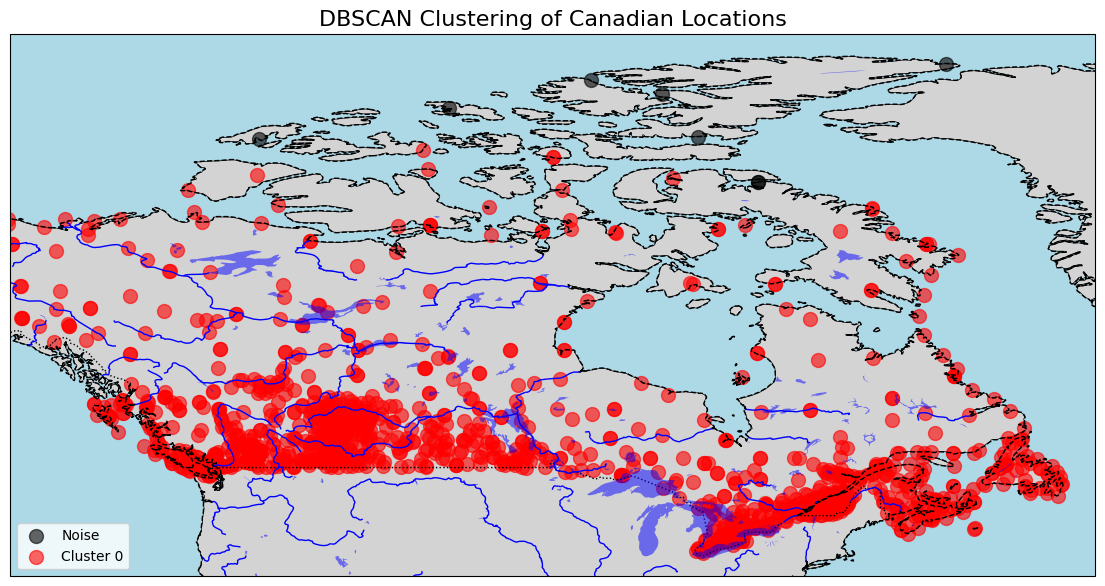

In [58]:
# Got this code from chatGPT :)
# Initialize the map with a PlateCarree projection
fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE, linestyle='--')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAKES, facecolor='blue', alpha=0.5)
ax.add_feature(cfeature.RIVERS, color='blue')
# Set the map extent to focus on Canada(roughly)
ax.set_extent([-140, -50, 40, 85], crs=ccrs.PlateCarree())

colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink']
unique_clusters = np.unique(weather_df['Cluster'])

# Plot the clustered data points on the map
for cluster in unique_clusters:
    cluster_data = weather_df[weather_df['Cluster'] == cluster]
    ax.scatter(
        cluster_data['Long'], 
        cluster_data['Lat'], 
        color=colors[cluster % len(colors)] if cluster != -1 else 'black',  # Black for noise
        label=f"Cluster {cluster}" if cluster != -1 else "Noise",
        s=100, 
        alpha=0.6, 
        transform=ccrs.PlateCarree()
    )

plt.legend(loc='lower left', fontsize=10)
plt.title('DBSCAN Clustering of Canadian Locations', fontsize=16)
plt.show()

### Summary
- Density Based clustering basics
- Data cleaning, visualization 
- Model Train and Test
Plot from the DBSCAN

In [59]:
print("The End!")

The End!
